In [22]:
!pip install missingno==0.5.2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
import missingno as msno
sns.set_theme(style="whitegrid")
%matplotlib inline 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [23]:
cuaca = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/auto_weather_stat/id-03/data.json")
geomagnetik = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/geomagnetic_stat/id-01/data.json")

In [24]:
cuacaT=cuaca.transpose()
cuacaT.tail(10)

dew  humidity  pressure  temperature     timestamp  volt
1729670883  26.35     73.02   1010.02        31.78  1.729671e+09  4.12
1729670943  26.11     72.53   1009.99        31.65  1.729671e+09  4.14
1729671003  26.13     72.41   1010.01        31.70  1.729671e+09  4.12
1729671063  26.17     72.76   1010.00        31.66  1.729671e+09  4.12
1729671123  26.15     72.81   1010.03        31.63  1.729671e+09  4.15
1729671183  26.04     72.62   1009.99        31.56  1.729671e+09  4.13
1729671243  25.91     72.54   1009.96        31.44  1.729671e+09  4.12
1729671303  25.94     72.63   1010.02        31.45  1.729671e+09  4.13
1729671363  26.01     72.91   1010.02        31.46  1.729671e+09  4.12
1729671423  26.10     73.37   1009.97        31.44  1.729671e+09  4.13

In [25]:
cuacaT.describe()

dew       humidity       pressure    temperature  \
count  442826.000000  442827.000000  442827.000000  442827.000000   
mean       25.029126      85.575489    1008.906845      27.857198   
std         1.496198      11.100459      51.065587       3.261294   
min        17.670000       0.000000      -9.050000       0.020000   
25%        24.170000      76.740000    1010.220000      25.440000   
50%        25.130000      89.920000    1011.510000      26.990000   
75%        26.060000      94.640000    1012.790000      30.340000   
max        29.700000      99.580000    1016.530000      41.120000   

          timestamp           volt  
count  4.428270e+05  442827.000000  
mean   1.716061e+09       4.090766  
std    8.307425e+06       0.031073  
min    0.000000e+00       0.000000  
25%    1.709138e+09       4.070000  
50%    1.716148e+09       4.090000  
75%    1.722888e+09       4.120000  
max    1.729671e+09       4.170000

In [26]:
cuacaT['timestamp']= cuacaT['timestamp'].astype(int)
cuacaT.tail(10)

dew  humidity  pressure  temperature   timestamp  volt
1729670883  26.35     73.02   1010.02        31.78  1729670883  4.12
1729670943  26.11     72.53   1009.99        31.65  1729670943  4.14
1729671003  26.13     72.41   1010.01        31.70  1729671003  4.12
1729671063  26.17     72.76   1010.00        31.66  1729671063  4.12
1729671123  26.15     72.81   1010.03        31.63  1729671123  4.15
1729671183  26.04     72.62   1009.99        31.56  1729671183  4.13
1729671243  25.91     72.54   1009.96        31.44  1729671243  4.12
1729671303  25.94     72.63   1010.02        31.45  1729671303  4.13
1729671363  26.01     72.91   1010.02        31.46  1729671363  4.12
1729671423  26.10     73.37   1009.97        31.44  1729671423  4.13

In [27]:
# Menampilkan 10 data terakhir
cuacaT.head(10)

dew  humidity  pressure  temperature   timestamp  volt
0           22.62     89.33   1011.29        24.49           0  4.06
1702296831  23.29     89.28   1010.72        25.18  1702296831  4.08
1702296891  23.29     89.38   1010.75        25.16  1702296891  4.08
1702296951  23.31     89.58   1010.76        25.14  1702296951  4.08
1702297011  23.35     89.86   1010.82        25.13  1702297011  4.08
1702297071  23.32     89.85   1010.82        25.10  1702297071  4.08
1702297131  23.29     89.81   1010.85        25.08  1702297131  4.08
1702297190  23.27     89.87   1010.84        25.05  1702297190  4.08
1702297251  23.26     89.88   1010.88        25.04  1702297251  4.09
1702297311  23.26     90.00   1010.86        25.02  1702297311  4.08

In [28]:
cuacaT.tail(10)

dew  humidity  pressure  temperature   timestamp  volt
1729670883  26.35     73.02   1010.02        31.78  1729670883  4.12
1729670943  26.11     72.53   1009.99        31.65  1729670943  4.14
1729671003  26.13     72.41   1010.01        31.70  1729671003  4.12
1729671063  26.17     72.76   1010.00        31.66  1729671063  4.12
1729671123  26.15     72.81   1010.03        31.63  1729671123  4.15
1729671183  26.04     72.62   1009.99        31.56  1729671183  4.13
1729671243  25.91     72.54   1009.96        31.44  1729671243  4.12
1729671303  25.94     72.63   1010.02        31.45  1729671303  4.13
1729671363  26.01     72.91   1010.02        31.46  1729671363  4.12
1729671423  26.10     73.37   1009.97        31.44  1729671423  4.13

In [29]:
# Tentukan batas bawah dan batas atas waktu yang wajar dalam format UNIX
start_timestamp = pd.Timestamp('2020-01-01').timestamp()  # UNIX time untuk 1 Januari 2020
end_timestamp = pd.Timestamp.now().timestamp()  # UNIX time saat ini

# Hapus data dengan timestamp di luar rentang waktu yang wajar
cuacaT = cuacaT[(cuacaT['timestamp'] >= start_timestamp) & (cuacaT['timestamp'] <= end_timestamp)]

In [30]:
# Konversi timestamp ke datetime dalam format UTC
cuacaT['timestamp'] = pd.to_datetime(cuacaT['timestamp'], unit='s', utc=True)

# Mengonversi ke zona waktu WIB (Asia/Jakarta)
cuacaT['timestamp'] = cuacaT['timestamp'].dt.tz_convert('Asia/Jakarta')

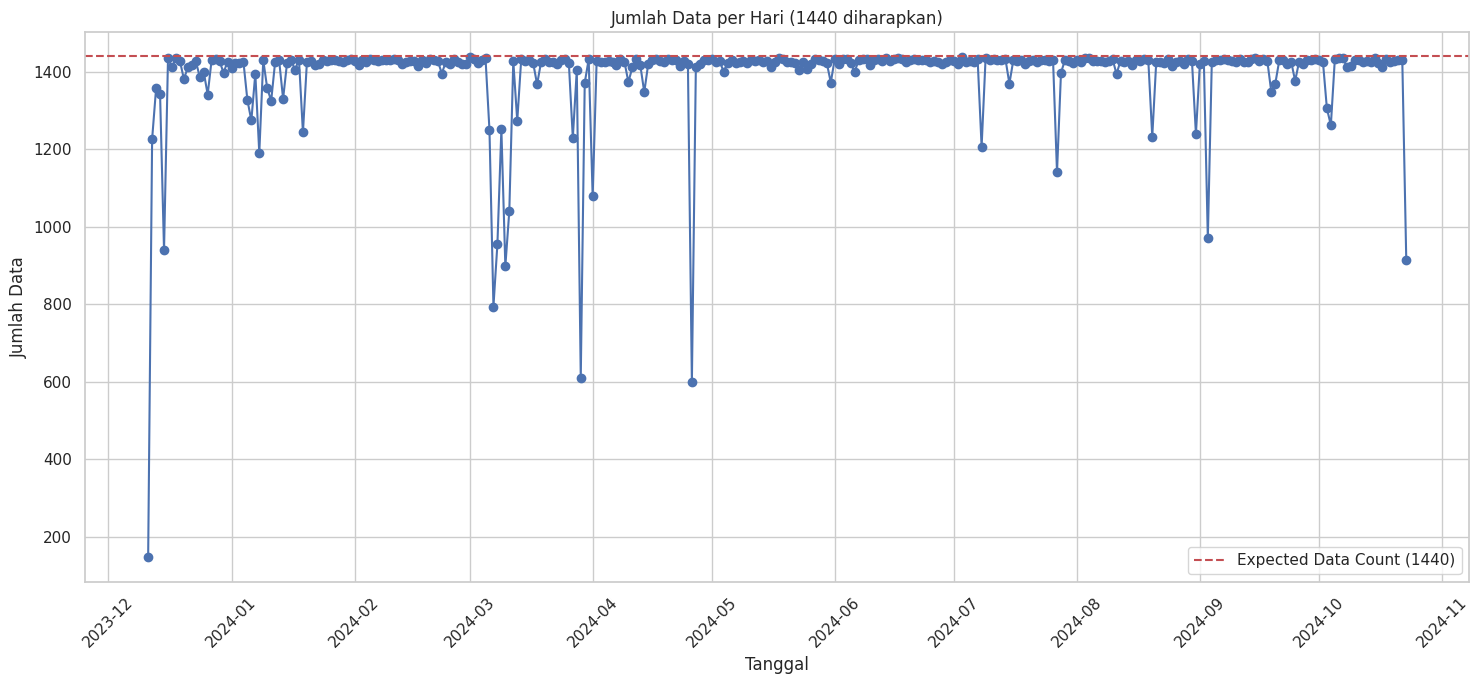

Hari dengan jumlah data yang kurang dari 1440:
           date  count
0    2023-12-11    148
1    2023-12-12   1226
2    2023-12-13   1357
3    2023-12-14   1343
4    2023-12-15    939
..          ...    ...
313  2024-10-19   1424
314  2024-10-20   1428
315  2024-10-21   1429
316  2024-10-22   1429
317  2024-10-23    914

[318 rows x 2 columns]


In [31]:

# Mengelompokkan data berdasarkan hari
cuacaT['date'] = cuacaT['timestamp'].dt.date
data_per_day = cuacaT.groupby('date').size().reset_index(name='count')

# Visualisasi jumlah data per hari
plt.figure(figsize=(15, 7))
plt.plot(data_per_day['date'], data_per_day['count'], marker='o', linestyle='-')
plt.axhline(y=1440, color='r', linestyle='--', label='Expected Data Count (1440)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Hari (1440 diharapkan)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Menampilkan hari-hari yang tidak memenuhi 1440 data
days_with_missing_data = data_per_day[data_per_day['count'] != 1440]
print("Hari dengan jumlah data yang kurang dari 1440:")
print(days_with_missing_data)

In [32]:
cuacaT.tail(10)

dew  humidity  pressure  temperature                 timestamp  \
1729670883  26.35     73.02   1010.02        31.78 2024-10-23 15:08:03+07:00   
1729670943  26.11     72.53   1009.99        31.65 2024-10-23 15:09:03+07:00   
1729671003  26.13     72.41   1010.01        31.70 2024-10-23 15:10:03+07:00   
1729671063  26.17     72.76   1010.00        31.66 2024-10-23 15:11:03+07:00   
1729671123  26.15     72.81   1010.03        31.63 2024-10-23 15:12:03+07:00   
1729671183  26.04     72.62   1009.99        31.56 2024-10-23 15:13:03+07:00   
1729671243  25.91     72.54   1009.96        31.44 2024-10-23 15:14:03+07:00   
1729671303  25.94     72.63   1010.02        31.45 2024-10-23 15:15:03+07:00   
1729671363  26.01     72.91   1010.02        31.46 2024-10-23 15:16:03+07:00   
1729671423  26.10     73.37   1009.97        31.44 2024-10-23 15:17:03+07:00   

            volt        date  
1729670883  4.12  2024-10-23  
1729670943  4.14  2024-10-23  
1729671003  4.12  2024-10-23  
1729671063  4.12  2024-10-23  
1729671123  4.15  2024-10-23  
1729671183  4.13  2024-10-23  
1729671243  4.12  2024-10-23  
1729671303  4.13  2024-10-23  
1729671363  4.12  2024-10-23  
1729671423  4.13  2024-10-23

In [33]:
# Simpan DataFrame 'cuacaT' ke file CSV bernama 'Cuaca.csv'
cuacaT.to_csv(
#cuacaT.tail(43200).to_csv(
    'cuaca.csv', 
    sep=',',
    index=False,
    index_label='timestamp'
)

In [13]:
datacuaca = pd.read_csv("/work/cuaca.csv")

In [14]:
datacuaca

dew  humidity  pressure  temperature                  timestamp  \
0       23.29     89.28   1010.72        25.18  2023-12-11 19:13:51+07:00   
1       23.29     89.38   1010.75        25.16  2023-12-11 19:14:51+07:00   
2       23.31     89.58   1010.76        25.14  2023-12-11 19:15:51+07:00   
3       23.35     89.86   1010.82        25.13  2023-12-11 19:16:51+07:00   
4       23.32     89.85   1010.82        25.10  2023-12-11 19:17:51+07:00   
...       ...       ...       ...          ...                        ...   
442792  26.05     72.31   1009.94        31.64  2024-10-23 14:44:03+07:00   
442793  26.18     73.02   1009.96        31.61  2024-10-23 14:45:03+07:00   
442794  26.40     73.49   1009.97        31.72  2024-10-23 14:46:03+07:00   
442795  26.15     72.68   1009.90        31.66  2024-10-23 14:47:03+07:00   
442796  25.97     71.93   1009.94        31.65  2024-10-23 14:48:06+07:00   

        volt        date  
0       4.08  2023-12-11  
1       4.08  2023-12-11  
2       4.08  2023-12-11  
3       4.08  2023-12-11  
4       4.08  2023-12-11  
...      ...         ...  
442792  4.12  2024-10-23  
442793  4.12  2024-10-23  
442794  4.12  2024-10-23  
442795  4.12  2024-10-23  
442796  4.13  2024-10-23  

[442797 rows x 7 columns]

In [15]:
# Mengubah kolom 'timestamp' menjadi datetime
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
datacuaca = datacuaca.sort_values(by='timestamp')

# Menambahkan kolom 'hour', 'minute', 'day', 'month', dan 'year' dari 'timestamp'
datacuaca['hour'] = datacuaca['timestamp'].dt.hour
datacuaca['minute'] = datacuaca['timestamp'].dt.minute
datacuaca['day'] = datacuaca['timestamp'].dt.day
datacuaca['month'] = datacuaca['timestamp'].dt.month
datacuaca['year'] = datacuaca['timestamp'].dt.year

# Menghapus data yang memiliki nilai kurang dari 0 pada kolom tertentu (misalnya suhu, kelembapan, tekanan, dll)
# Gantilah nama kolom sesuai dengan nama kolom pada DataFrame Anda
datacuaca = datacuaca[(datacuaca['temperature'] >= 10) & 
                      (datacuaca['humidity'] >= 0) & 
                      (datacuaca['pressure'] >= 1000) & 
                      (datacuaca['dew'] >= 10) &
                      (datacuaca['volt'] >= 0)]

# Tampilkan hasil
print(datacuaca.head())

     dew  humidity  pressure  temperature                 timestamp  volt  \
0  23.29     89.28   1010.72        25.18 2023-12-11 19:13:51+07:00  4.08   
1  23.29     89.38   1010.75        25.16 2023-12-11 19:14:51+07:00  4.08   
2  23.31     89.58   1010.76        25.14 2023-12-11 19:15:51+07:00  4.08   
3  23.35     89.86   1010.82        25.13 2023-12-11 19:16:51+07:00  4.08   
4  23.32     89.85   1010.82        25.10 2023-12-11 19:17:51+07:00  4.08   

         date  hour  minute  day  month  year  
0  2023-12-11    19      13   11     12  2023  
1  2023-12-11    19      14   11     12  2023  
2  2023-12-11    19      15   11     12  2023  
3  2023-12-11    19      16   11     12  2023  
4  2023-12-11    19      17   11     12  2023  


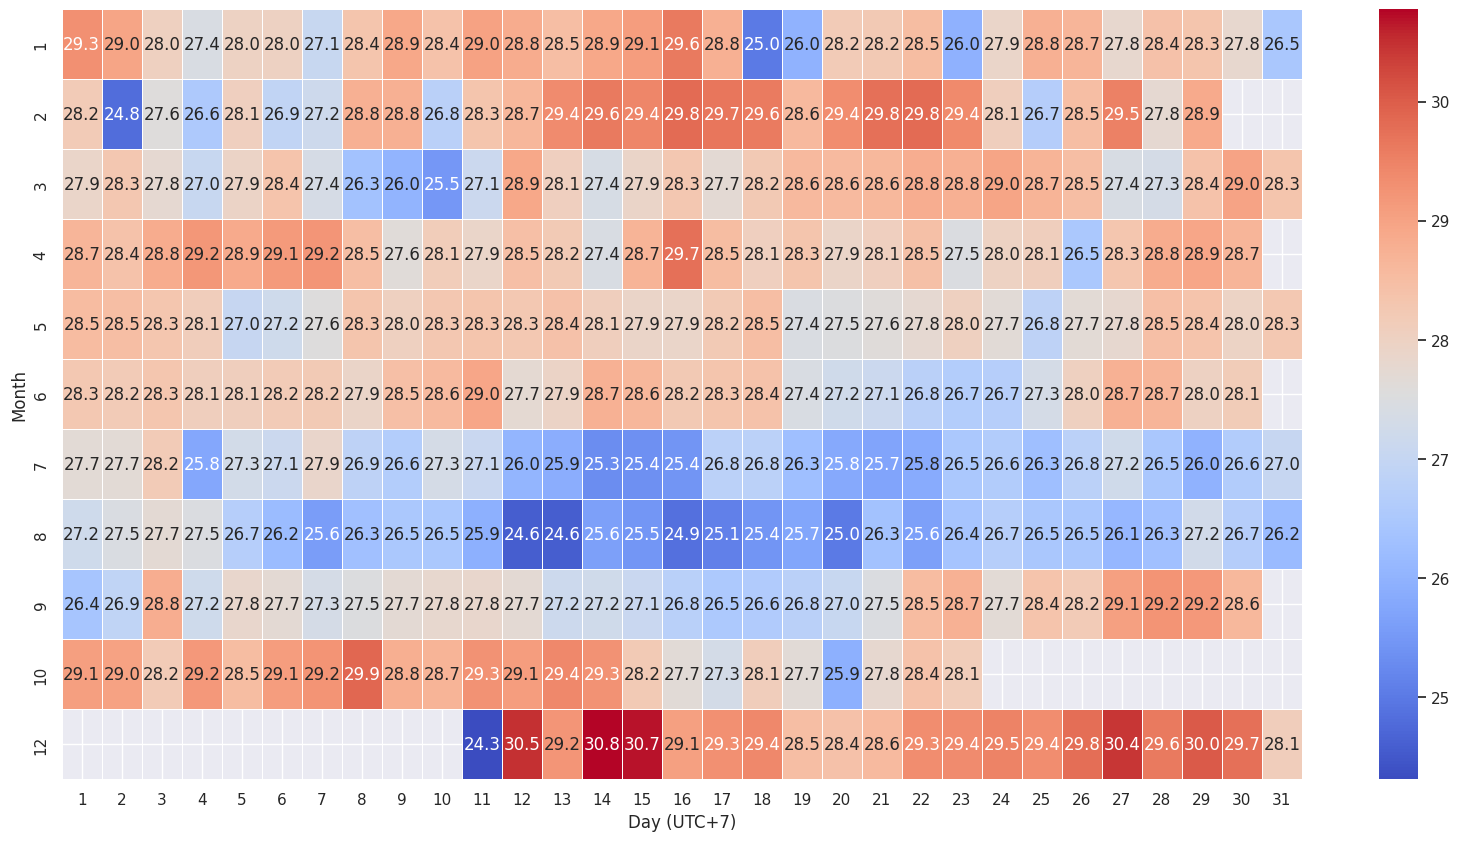

In [16]:
# Mengelompokkan data berdasarkan 'month' dan 'day', menghitung rata-rata suhu
datacuaca_grouped = datacuaca.groupby(['month', 'day']).agg({'temperature': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap (sumbu X: hari, sumbu Y: bulan)
temperature_pivot = datacuaca_grouped.pivot(index='month', columns='day', values='temperature')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(20, 10))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Day (UTC+7)')
ax.set_ylabel('Month')

# Menampilkan heatmap
plt.show()


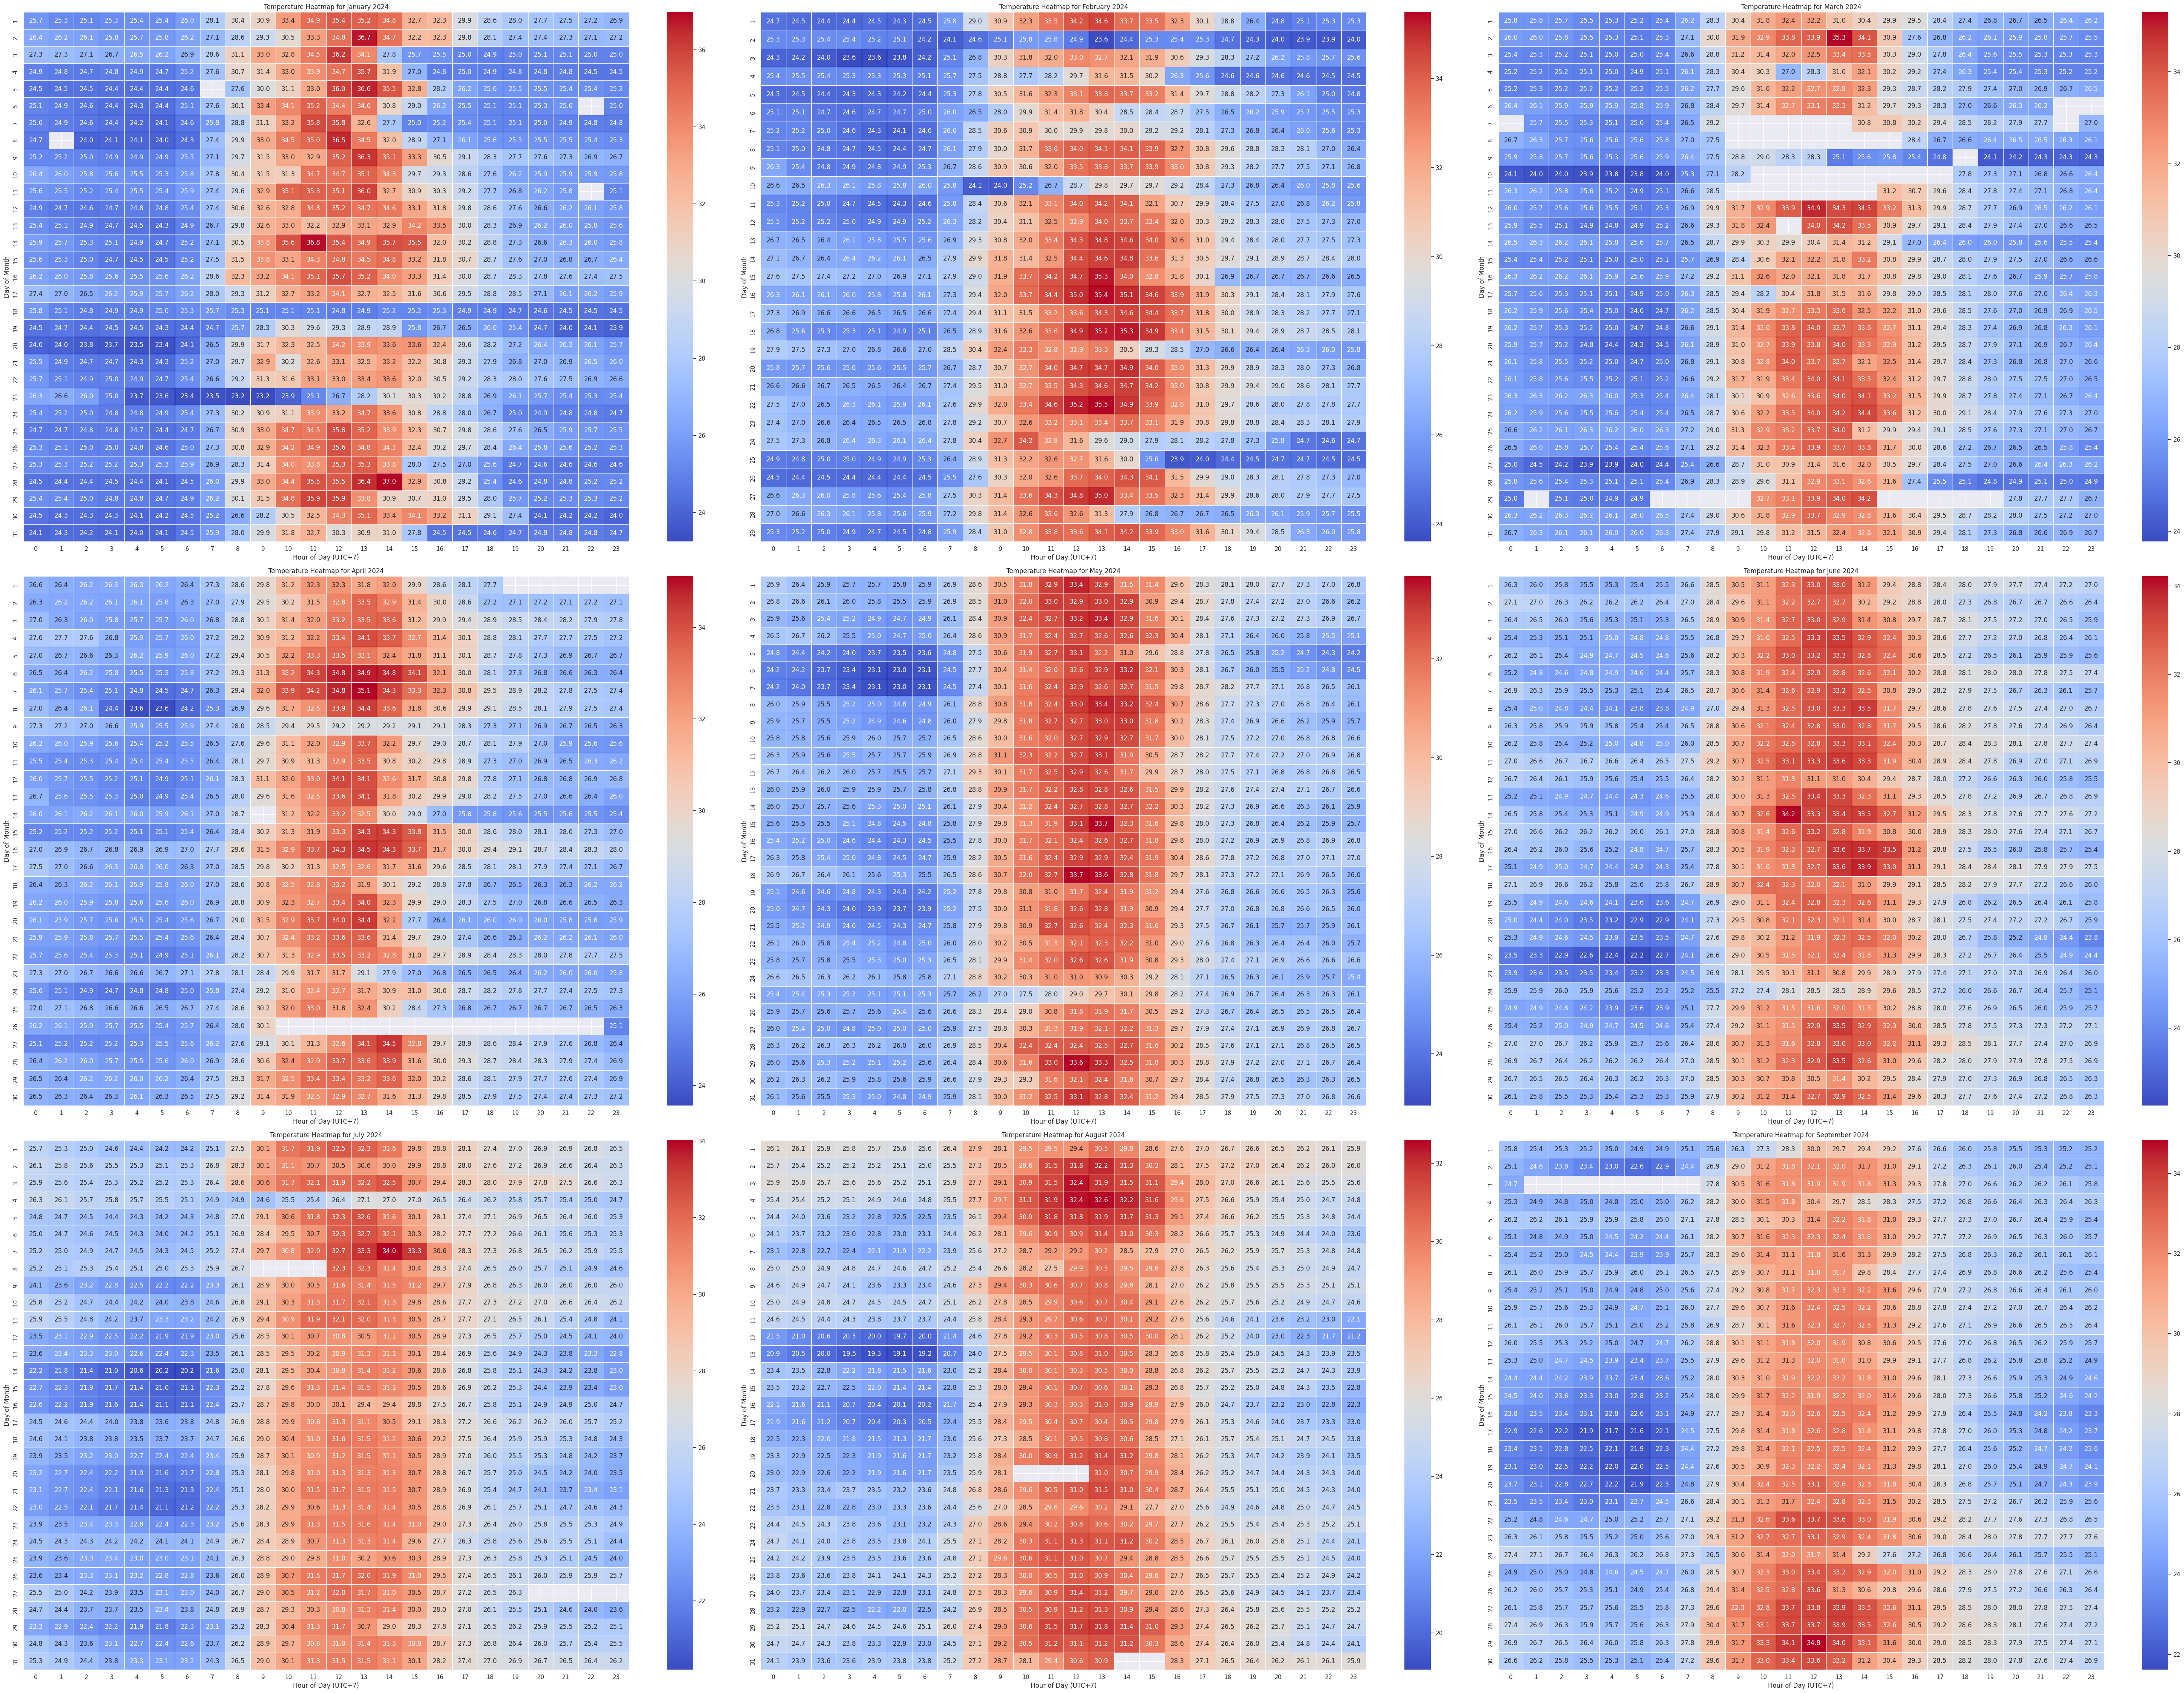

In [17]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']

# Menentukan rentang bulan dari Januari hingga September
months = range(1, 10)  # Bulan 1 hingga 9

# Mengatur ukuran grafik untuk menampung semua heatmap
fig, axs = plt.subplots(3, 3, figsize=(60, 45))
axs = axs.flatten()  # Meratakan array subplot untuk iterasi yang lebih mudah

# Looping untuk setiap bulan
for month in months:
    # Filter data untuk bulan tertentu
    monthly_data = datacuaca[(datacuaca['timestamp'].dt.year == 2024) & (datacuaca['timestamp'].dt.month == month)]

    # Mengurutkan data berdasarkan 'timestamp'
    monthly_data = monthly_data.sort_values(by='timestamp')

    # Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
    monthly_data['day'] = monthly_data['timestamp'].dt.day
    monthly_data['hour'] = monthly_data['timestamp'].dt.hour

    # Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
    datacuaca_grouped = monthly_data.groupby(['day', 'hour']).agg({'temperature': 'mean'}).reset_index()

    # Pivot dataframe untuk membuat format yang sesuai dengan heatmap
    temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='temperature')

    # Membuat heatmap untuk bulan tersebut
    sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=axs[month-1], cmap="coolwarm")
    
    # Memberi judul pada heatmap
    axs[month-1].set_title(f'Temperature Heatmap for {month_names[month-1]} 2024')
    axs[month-1].set_xlabel('Hour of Day (UTC+7)')
    axs[month-1].set_ylabel('Day of Month')

# Mengatur layout
plt.tight_layout()

# Menampilkan heatmaps
plt.savefig("Heatmap_month.jpg")
plt.show()



In [18]:
pilih_tahun = 2024
pilih_bulan = 10

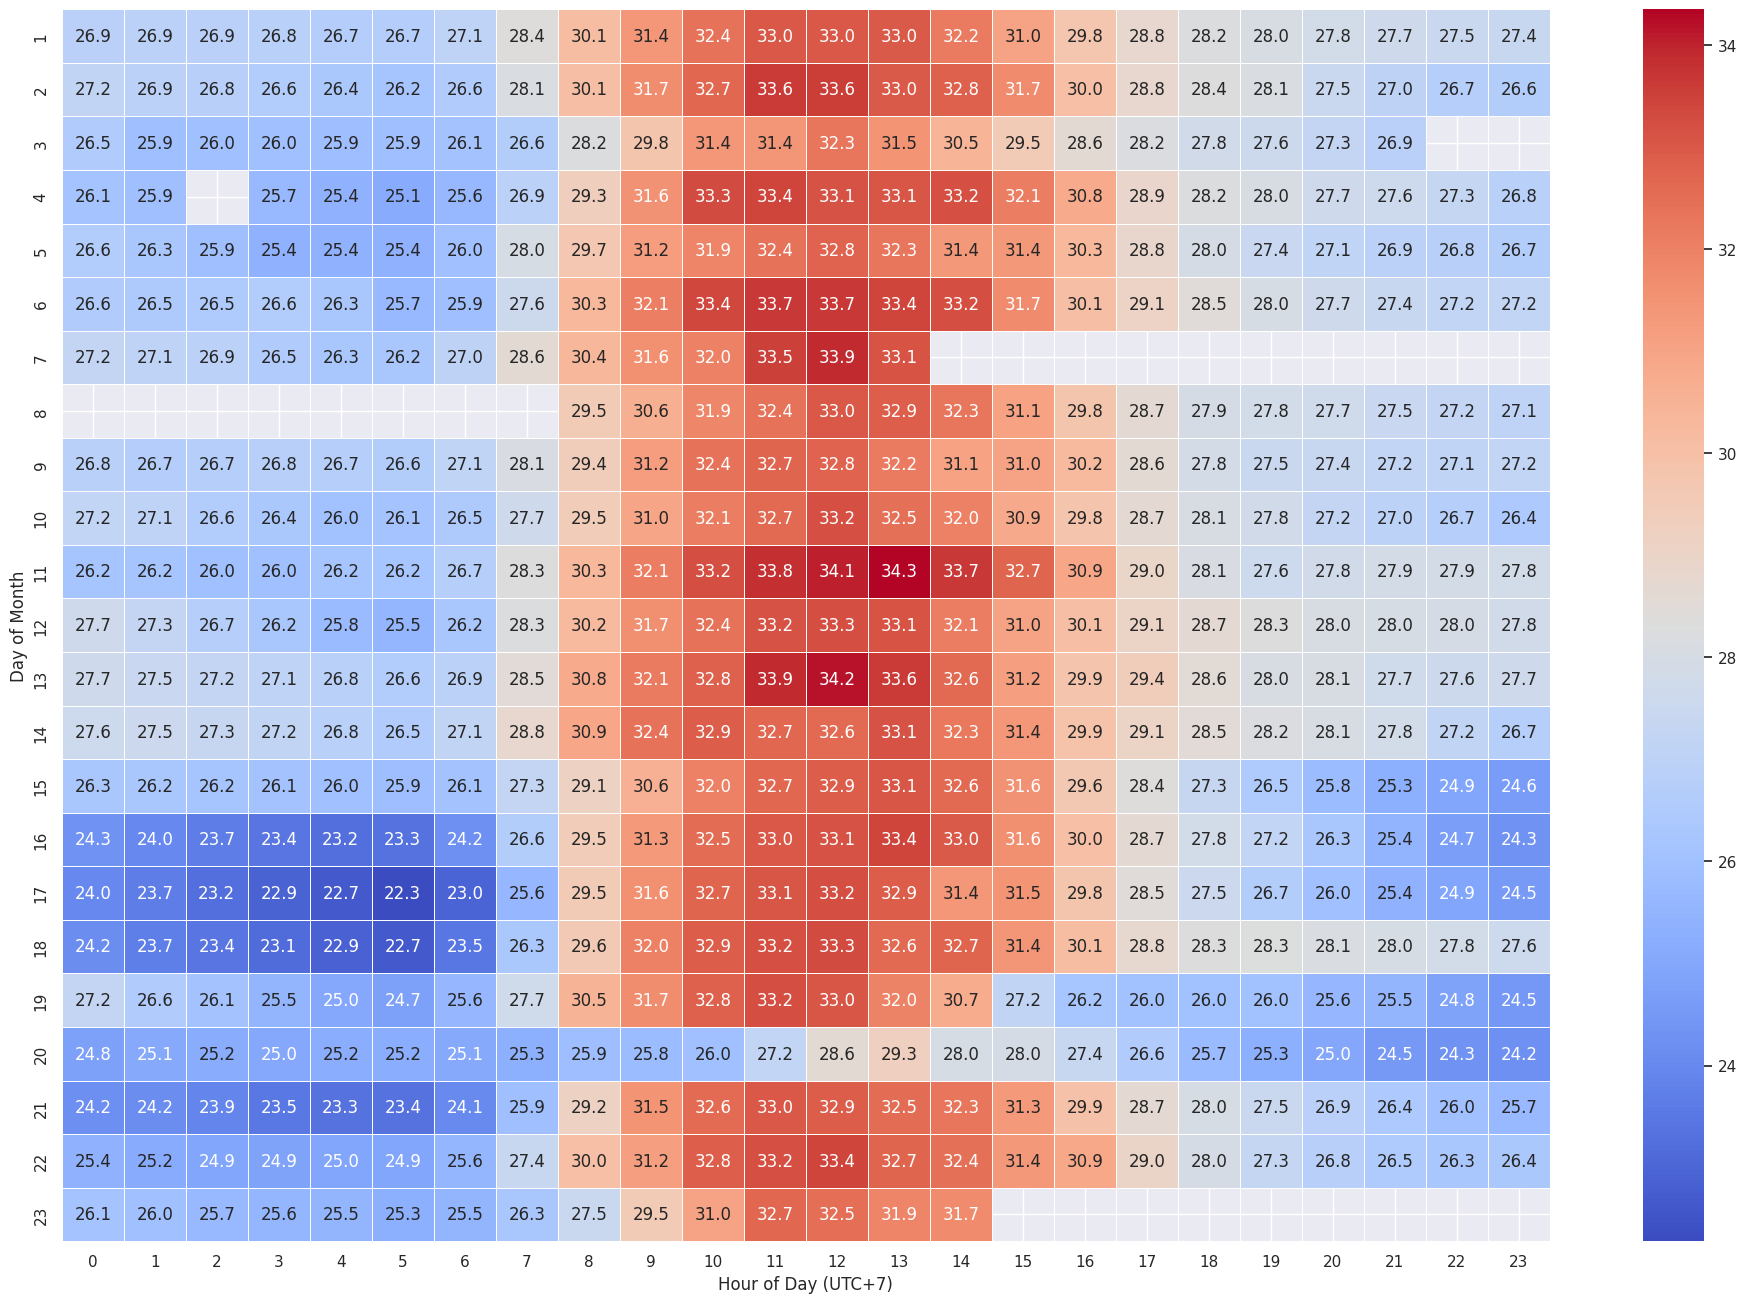

In [19]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'temperature': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='temperature')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.savefig("Temp_month.jpg")
plt.show()



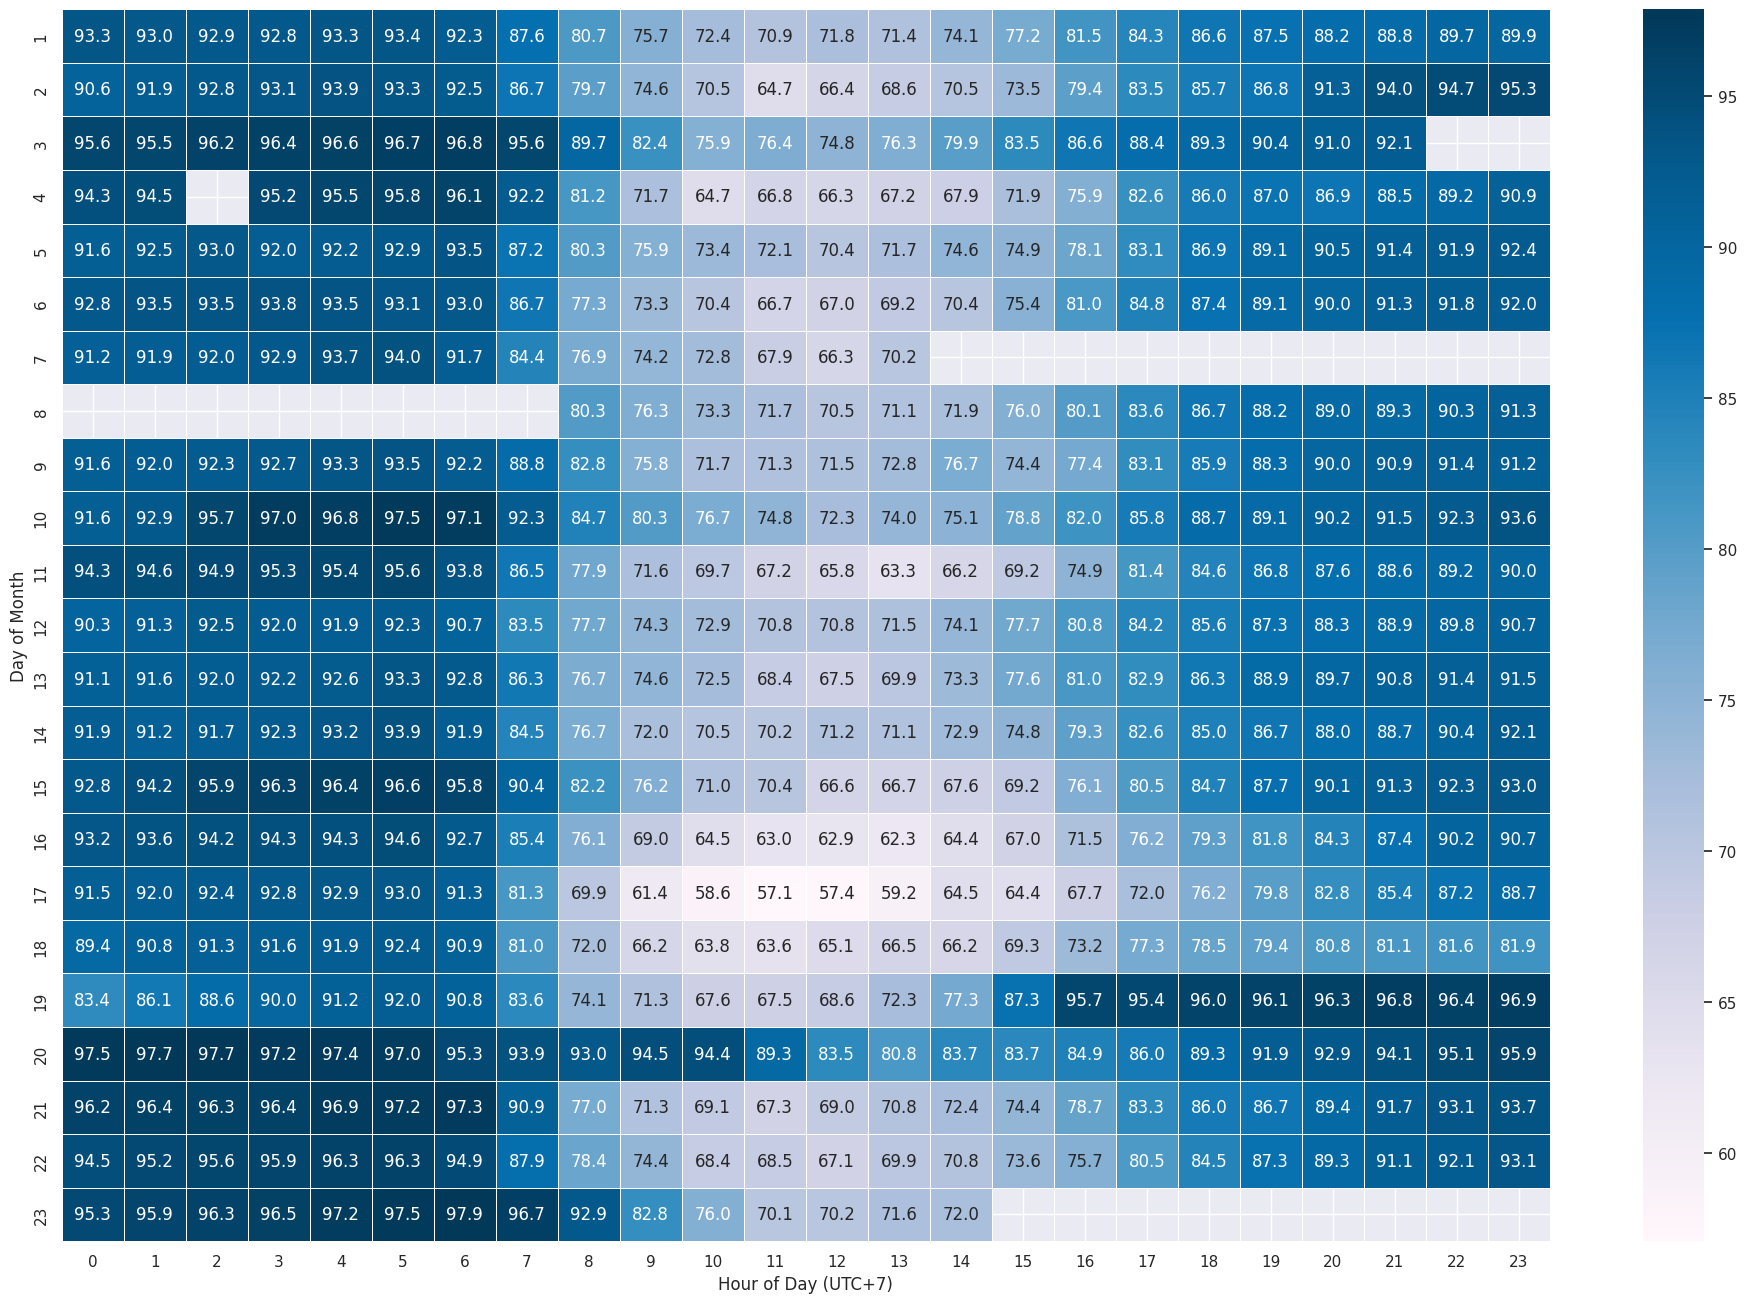

In [20]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'humidity': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
humidity_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='humidity')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(humidity_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="PuBu")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.show()

Text(266.25, 0.5, 'Day of Month')

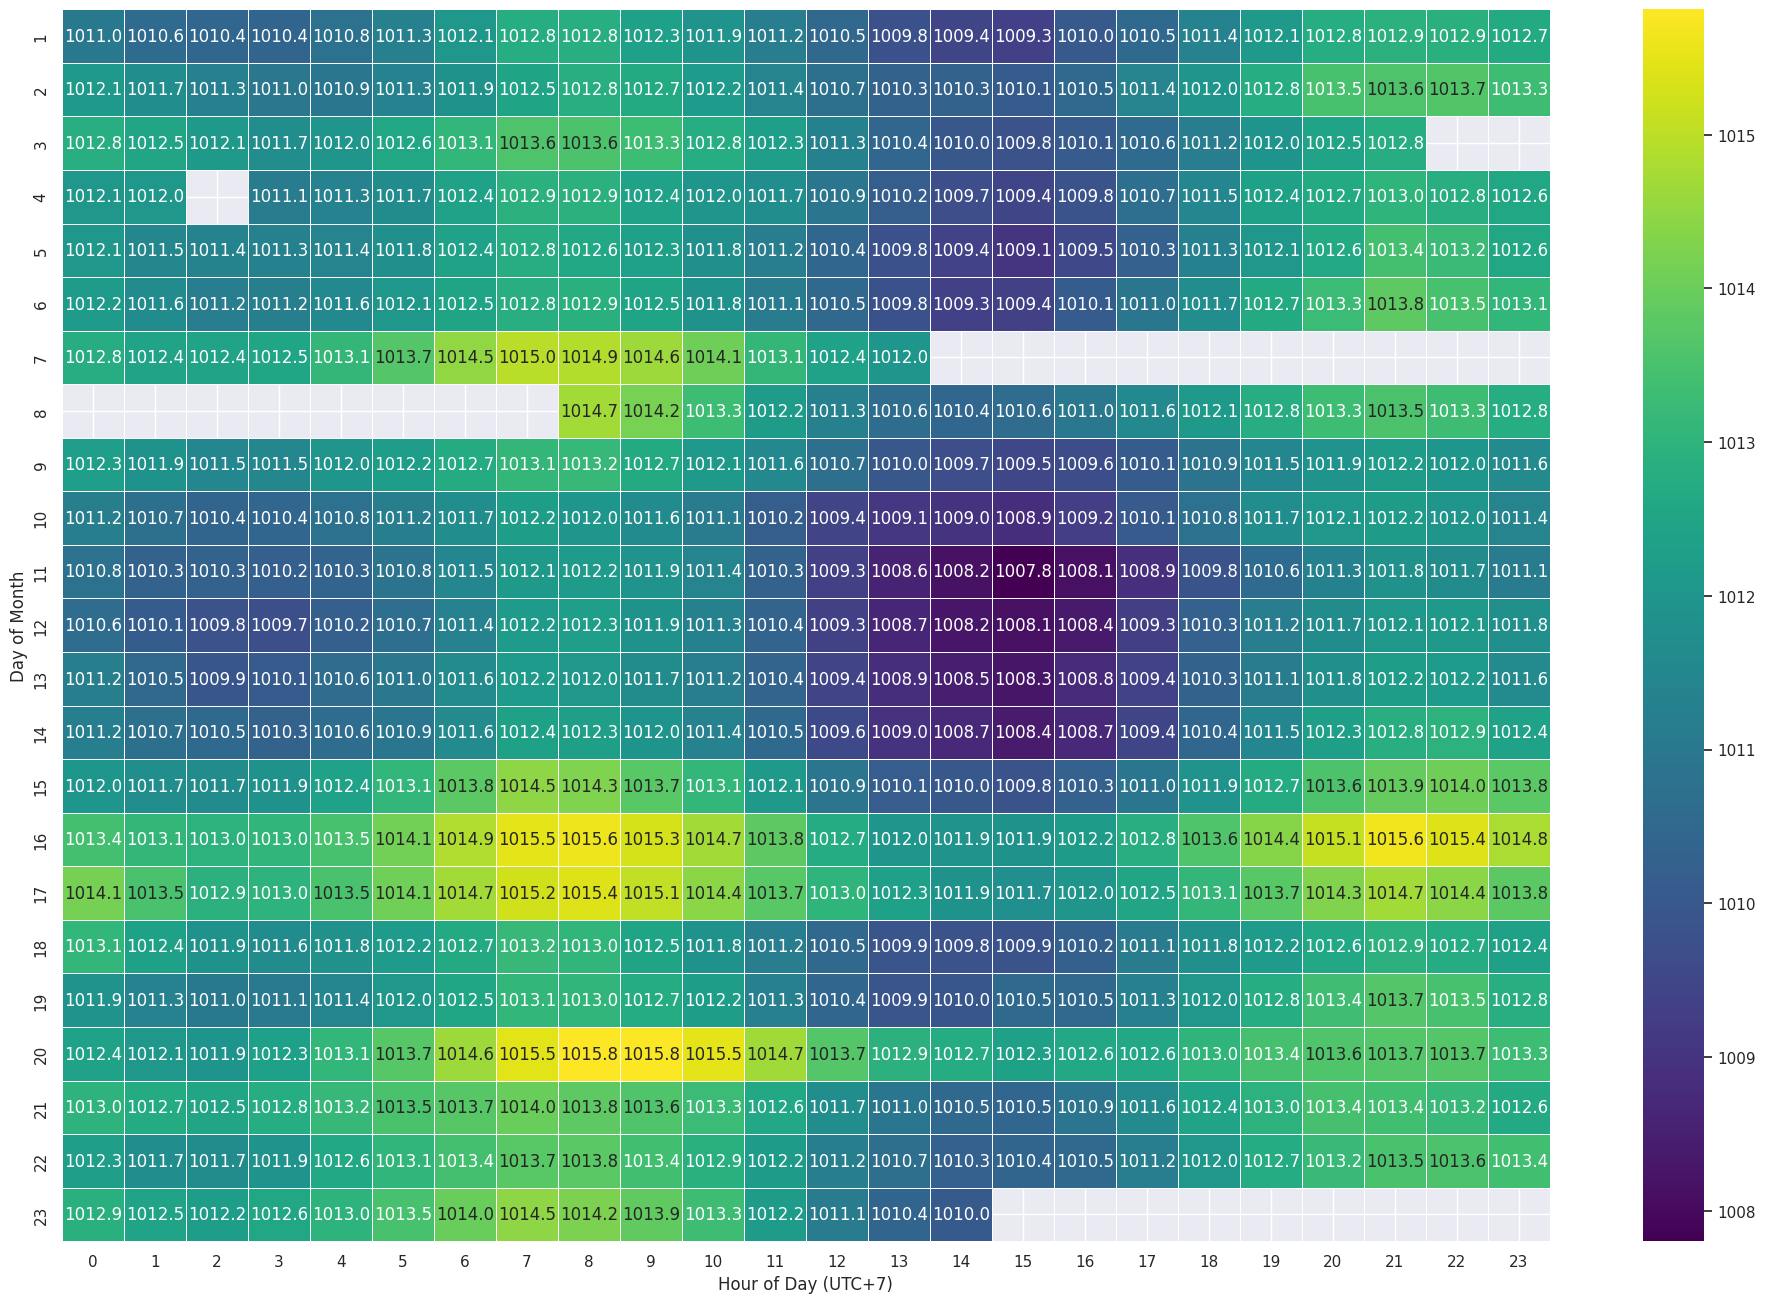

In [21]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'pressure': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
pressure_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='pressure')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(pressure_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="viridis")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>